# 인프런 2020년 새해 다짐 이벤트 댓글 분석

[[출처 - 오늘코드]](https://www.youtube.com/watch?v=OUSwQk79H8I)

## 1. 크롤링

In [1]:
# 라이브러리 로드
# 웹사이트 내용 가져오기
import requests
# 읽어온 웹페이지를 파싱
from bs4 import BeautifulSoup as bs
# 크롤링 한것을 데이터 프레임 형태로 보기
import pandas as pd
# 진행상황 확인
from tqdm import trange

In [2]:
# web url
base_url = "https://www.inflearn.com/pages/newyear-event-20200102"
response = requests.get( base_url )
soup = bs(response.text, 'html.parser' )

In [3]:
content = soup.select("#main > section > div > div > div.chitchats > div.chitchat-list > div")
content[-1]

<div class="chitchat-item">
<figure class="image is-48x48">
<img alt="인프런" class="user_thumb is-rounded" src="https://cdn.inflearn.com/wp-content/uploads/avatars/17/b415d9fa24d186c4adf22ca9a49116b5-bpfull.png"/>
</figure>
<div class="content">
<div class="author">
<span class="author_name">인프런</span>
<time class="created_at" datetime="Sun Dec 29 2019 17:59:00 GMT+0900 (GMT+09:00)">⋅ 3개월 전</time>
<a class="update-chitchat edit-chitchat is-hidden" data-id="18594" type="button">저장</a>
<a class="hidden-editor edit-chitchat is-hidden" type="button">취소</a>
<a class="edit-chitchat no_cmt_reply" type="button">답글달기</a>
</div>
<div class="body edit-chitchat">인프런 0호 팀원이에요!
그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론 통계나 분석을 많이 하고 싶어서 파이썬을 공부하고 싶어요! 올해 파이썬 마스터가 되는걸로..
#관심강의: 남박사의 파이썬 활용</div>
<textarea class="textarea edit-chitchat is-hidden"></textarea>
<div class="summary_comments">
</div>
<div class="chitchats_and_editor is-hidden">
<div class="chitchat-comment-list">
</div>
<div class="cmt-editor">
<div c

In [4]:
# strip => 공백제거
chitchat = content[-1].select("div.body.edit-chitchat")[0].get_text(strip=True)
chitchat

'인프런 0호 팀원이에요!\n그동안 서비스 개발 때문에 js 를 많이 했었는데 앞으론 통계나 분석을 많이 하고 싶어서 파이썬을 공부하고 싶어요! 올해 파이썬 마스터가 되는걸로..\n#관심강의: 남박사의 파이썬 활용'

In [5]:
content_count = len(content)
content_count

2449

In [6]:
events = []
for i in trange(content_count):
    chitchat = content[i].select("div.body.edit-chitchat")[0].get_text(strip=True)
    events.append(chitchat)

100%|████████████████████████████████████████████████████████████████████████████| 2449/2449 [00:02<00:00, 1088.41it/s]


In [7]:
df = pd.DataFrame({"text" : events})
df.shape

(2449, 1)

In [8]:
df.to_csv("inflearn-event.csv", index=False)

In [9]:
pd.read_csv("inflearn-event.csv").head()

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!


## 2.데이터 로드

In [10]:
import numpy as np
import re
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
# 폰트설정
plt.rc("font", family="Malgun Gothic")

In [12]:
df

,text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
2,2020년 목표 : 리액트 공부하기
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
...,...
2444,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스..."
2445,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
2446,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다..."
2447,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...


 ## 3.데이터 전처리

In [13]:
# 빈도수 중복을 방지하기 위해 중복값을 제거
print(df.shape)

(2449, 1)


In [14]:
# 최근것을 남기고 중복을 제거
df = df.drop_duplicates(["text"], keep="last")
print(df.shape)

(2411, 1)


In [15]:
# 전처리 원본 복사
df["origin_text"] = df["text"]

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
df

,text,origin_text
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...
1,"2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!
...,...,...
2444,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스...","작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스..."
2445,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...
2446,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...","에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다..."
2447,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...


In [17]:
# 소문자로 모두 변경
df["text"] = df["text"].str.lower()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# 의미통일
df["text"] = df["text"].str.replace(
"python", "파이썬").str.replace(
"pandas", "판다스").str.replace(
"javascript", "자바스크립트").str.replace(
"java", "자바").str.replace(
"react", "리액트")

C:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [19]:
# 관심강의 분리
df["course"] = df["text"].apply(lambda x: x.split("관심강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강의")[-1])
df["course"] = df["course"].apply(lambda x: x.split("관심 강좌")[-1])
df["course"] = df["course"].str.replace(":", "")
df["course"].head()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

0    2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1    2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...
3                  40대 프로그래밍 시작!  우리를 위한 프로그래밍  파이썬 중급
4                       2020년 목표  돌머리 비전공자가 멋진 전공자 되기!
5                     2020 년목표 비전공자(경영)가 전공자(it) 되기!!!
Name: course, dtype: object

In [20]:
df[["text", "course"]].head()

,text,course
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ..."
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표 비전공자(경영)가 전공자(it) 되기!!!


In [21]:
search_keyword = ['머신러닝', '딥러닝', '파이썬', '판다스', '공공데이터', 'django', 
                 '크롤링', '시각화', '데이터분석', '웹개발', '엑셀', 'c', '자바',
                 '자바스크립트', 'node', 'vue', '리액트']

for keyword in search_keyword:
    df[keyword] = df["course"].str.contains(keyword)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
df

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
0,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표: 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 ...,2020년 목표 스프링 열심히 공부하서 직장에서 사랑받고 싶어요!!\n관심 있는 강...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,"2020년 목표: c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는...","2020년 목표: C++ 열심히 공부해서, 학교에서 꼭 A 맞기..!! \n관심있는...","2020년 목표 c++ 열심히 공부해서, 학교에서 꼭 a 맞기..!! \n관심있는 ...",False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 : 돌머리 비전공자가 멋진 전공자 되기!,2020년 목표 돌머리 비전공자가 멋진 전공자 되기!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표: 비전공자(경영)가 전공자(it) 되기!!!,2020 년목표 비전공자(경영)가 전공자(it) 되기!!!,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,"작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 jpa 강의를 또 스...","작년 한해도 일이 바쁘다, 야근해서 힘들다는 핑계로 김영한님의 JPA 강의를 또 스...",스프링 데이터 jpa,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2445,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...,저는 졸업을 1년 남기고 있는 컴퓨터공학과 학생입니다. 졸업 프로젝트로 웹/앱 개발...,스프링 부트 개념과 활용,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2446,"에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...","에프터 이펙트를 써본 적은 있는데, 매번 기초만 배우다 말았어요. 이걸 할 줄 안다...",에펙 초보자도 만들 수 있는 유튜브 인트로 에프터이펙트 강좌,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2447,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,저번에 인프런에서 페이스북 마케팅 강의를 듣고 많은 도움을 받았습니다. 마케팅 업무...,파이썬 입문 및 웹 크롤링을 활용한 다양한 자동화 어플리케이션 제작하기,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [23]:
df_python = df[df["text"].str.contains("파이썬|공공데이터|판다스")].copy()
print(df_python.shape)
df_python.head()

(430, 20)


,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,시각화,데이터분석,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트
3,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! : 우리를 위한 프로그래밍 : 파이썬 중급,40대 프로그래밍 시작! 우리를 위한 프로그래밍 파이썬 중급,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
18,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,파이썬 데이터시각화 분석 실전 프로젝트 수강하고 싶어요,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
21,머신러닝 제대로 배워보고 싶습니다.\n#관심강의 : 파이썬 머신러닝 완벽가이드,머신러닝 제대로 배워보고 싶습니다.\n#관심강의 : 파이썬 머신러닝 완벽가이드,파이썬 머신러닝 완벽가이드,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
25,"#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...","#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 ...","프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기\n파...",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False
29,자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.\n#관심...,자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 Python이 궁금합니다.\n...,"프로그래밍 시작하기 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기",False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [24]:
df[search_keyword].sum().sort_values(ascending = False)

c         410
파이썬       406
자바        341
자바스크립트    140
리액트       137
머신러닝      133
vue       132
node      117
크롤링        56
딥러닝        53
django     31
시각화        30
웹개발        27
데이터분석      24
엑셀         18
공공데이터      12
판다스         6
dtype: int64

In [25]:
text = df.loc[(df["공공데이터"] == True), "text"]
for t in text:
    print("-"*20)
    print(t)

--------------------
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
파이썬의 고수가 되고싶어요
--------------------
자바기반 웹 개발자입니다. 데이터 분석에 많이 쓰이는 파이썬이 궁금합니다.
#관심강의: 프로그래밍 시작하기 : 파이썬 입문, 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 안에 원하는 공부 다 끝내보려고요. 내년이면 수능이라..

#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
it개발자입니다. 개발을 오래 안하고 관리만 했더니 다시 개발이 너무 하고싶습니다. 올해는 인프런을 통해서 개발쪽 스킬셋을 업그레이드 하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
파이썬 데이터분석 마스터
#관심강의:공공데이터로 파이썬 데이터 분석 시작하기
--------------------
올해 졸업하는 컴퓨터공학과 학생입니다!
백엔드 혹은 데이터 엔지니어 쪽으로 취업하고 싶습니다!
#관심강의: 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
텍스트 마이닝만 수강한 뒤 현재 맡은 마케팅 업무 능률이 엄청나게 올라가는 것을 확인했으며 승진과 고가에 엄청나게 득을 보았습니다 감사합니다! 앞으로도 인프런 애용하겠습니다.
추가적으로 해 박조은 강사님의 [공공데이터로 파이썬 데이터 분석 시작하기] 강의를 듣고 상권분석과 공공데이터 활용 역량을 올릴 예정입니다. 화이팅!!!
#관심강의 : 공공데이터로 파이썬 데이터 분석 시작하기
--------------------
데이터분석 2년차가 되는데 작년에 파이썬 강의를 담아놓고 그대로 1년간 방치... 올해는 꼭 완강하고 실습해서 개발자에게 의존하지 않고 혼자 크롤링&분석 해내고 싶어요! 
#관심강의: 공공데이터로 파이썬 데이터분석 시작하기, database 1&2 - mysql
------

In [26]:
df.loc[(df["판다스"]),"text"]

541     2020년에는 데이터분석 관련한 실력을 쌓고싶습니다!\n#관심강의 : 파이썬, 판다...
690     취미로 안드로이드 개발하는 사람입니다. 자바로 작성하다 보니, kotlin이 안드로...
758          판다스 라입러리에 관심이 많아서 배워보려 합니다 #관심강의 : 박조은 - 판다스
1237      2020년!! 올 해는 빅데이터 분석 전문가 되기!!\n#관심강의 : 파이썬, 판다스
2155    2020년 목표  파이썬 을  활용해  데이터 분석 작업을 진행하고 싶습니다.  관...
2365    저는 백세시대에 조금 더 오랫동안 it일을 하기위해서 it전략기획에서 데이터분석가로...
Name: text, dtype: object

## 4.빈도수 계산을 위한 텍스트 데이터 벡터화

In [27]:
# 파이썬의 머신러닝 라이브러리
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vectorizer = CountVectorizer(analyzer = 'word',  # 캐릭터 단위로 벡터화 가능(단위설정)
                            tokenizer = None,    # 토크나이저를 따로 지정 가능(토큰화 단위)
                            preprocessor = None, # 전처리 도구
                            stop_words = None,   # 불용어 nltk등의 도구를 사용 가능
                            min_df = 2,          # 토큰이 나타날 최소 문서 개수로 오타나
                                                 # 자주 나오지 않는 특수한 전문용어 
                            ngram_range=(3,6),   # BOW의 단위 갯수의 범위를 지정
                                                 #(토큰화한 단위를 얼마만큼 묶을것인지)
                            max_features = 2500) # 만들 피처의 수, 단어의 수
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=2500, min_df=2,
                ngram_range=(3, 6), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [29]:
feature_vector = vectorizer.fit_transform(df['course'])
feature_vector.shape

(2411, 2333)

In [30]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

2333


['12개 만들면서 배우는',
 '12개 만들면서 배우는 ios',
 '12개 만들면서 배우는 ios 아이폰',
 '12개 만들면서 배우는 ios 아이폰 개발',
 '12개를 만들며 배우는',
 '12개를 만들며 배우는 swift4',
 '12개를 만들며 배우는 swift4 ios11',
 '12개를 만들며 배우는 swift4 ios11 아이폰',
 '2018 do it',
 '2018 do it 안드로이드']

In [31]:
pd.DataFrame(feature_vector[:10].toarray(), columns=vocab).head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# 위에서구한 단어벡터 (vocab)을 sum해서 단어가 전체에서 등장하는 횟수를 구한다.
# 벡터화 된 피처를 확인한다.
# BOW (Bag of words )에 몇개의 단어가 들어있는지 확인
dist = np.sum(feature_vector, axis=0)

df_freq = pd.DataFrame(dist, columns=vocab)
df_freq

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,2,2,2,2,2,2,2,2,2,2,...,13,12,2,8,8,2,2,2,2,2


In [33]:
# 가장 많이 언급된 강의
df_freq.T.sort_values(by=0, ascending=False).head(100)

,0
홍정모의 따라하며 배우는,100
스프링 데이터 jpa,60
nodebird sns 만들기,60
머신러닝 완벽 가이드,49
리액트로 nodebird sns 만들기,49
...,...
위한 리액트 핵심 강좌,20
누구든지 하는 리액트 초심자를 위한 리액트,20
리액트 초심자를 위한,20
하는 리액트 초심자를 위한,20


## 5. TF-IDF 를 통해 가중치를 주어 불용어를 컨트롤

### TfidfTransformer()
- norm='l2' 각 문서의 피처 벡터를 어떻게 벡터 정규화 할지 정한다.
    - L2: 벡터의 각 원소의 제곱의 합이 1이 되도록 만드는 것이고 기본 값(유클리디안거리)
    - L1: 벡터의 각 원소의 절댓값의 합이 1이 되도록 크기를 조절(맨하탄거리)
- smooth_idf = False
    - 피처를 만들 때 0으로 나오는 항목에 대해 작은 값을 더해서(스무딩을 해서) 피처를 만들지
        그냥 생성할지를 결정
- sublinear_tf = False
- use_idf = True
    - TF-IDF를 사용해 피처를 만들 것인지 아니면 단어 빈도 자체를 사용할 것인지 여부

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [35]:
%%time
feature_tfidf = transformer.fit_transform(feature_vector)
feature_tfidf.shape

Wall time: 6.98 ms


(2411, 2333)

In [36]:
feature_tfidf

<2411x2333 sparse matrix of type '<class 'numpy.float64'>'
	with 12227 stored elements in Compressed Sparse Row format>

In [37]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector에 TF-IDF 가중치 반영
tfidf_freq = pd.DataFrame(feature_tfidf.toarray(), columns=vocab)
tfidf_freq.head()

,12개 만들면서 배우는,12개 만들면서 배우는 ios,12개 만들면서 배우는 ios 아이폰,12개 만들면서 배우는 ios 아이폰 개발,12개를 만들며 배우는,12개를 만들며 배우는 swift4,12개를 만들며 배우는 swift4 ios11,12개를 만들며 배우는 swift4 ios11 아이폰,2018 do it,2018 do it 안드로이드,...,활용한 다양한 자동화 어플리케이션,활용한 다양한 자동화 어플리케이션 제작하기,활용한 데이터분석과 it보안,활용한 리액트 native,활용한 리액트 native 개발,활용한 메신져 만들기,활용한 메신져 만들기 android,활용한 파이썬 프로그래밍,활용한 파이썬 프로그래밍 완벽,활용한 파이썬 프로그래밍 완벽 이해
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
df_tfidf = pd.DataFrame(tfidf_freq.sum())
df_tfidf_top = df_tfidf.sort_values(by=0, ascending=False)
df_tfidf_top.head(20)

,0
홍정모의 따라하며 배우는,66.359366
스프링 데이터 jpa,35.431606
nodebird sns 만들기,26.772904
리액트로 nodebird sns 만들기,24.149539
리액트로 nodebird sns,24.149539
파이썬 머신러닝 완벽,24.054423
머신러닝 완벽 가이드,23.806695
파이썬 머신러닝 완벽 가이드,23.151517
프로그래밍과 자바스크립트 es6,19.183823
함수형 프로그래밍과 자바스크립트,18.267370


In [39]:
# 중간에 생략되는 단어를 자세히 보고자 할 때
for t in df_tfidf_top.index[:50]:
    print(t)

홍정모의 따라하며 배우는
스프링 데이터 jpa
nodebird sns 만들기
리액트로 nodebird sns 만들기
리액트로 nodebird sns
파이썬 머신러닝 완벽
머신러닝 완벽 가이드
파이썬 머신러닝 완벽 가이드
프로그래밍과 자바스크립트 es6
함수형 프로그래밍과 자바스크립트
함수형 프로그래밍과 자바스크립트 es6
부트 개념과 활용
스프링 부트 개념과
스프링 부트 개념과 활용
실전 스프링 데이터
실전 스프링 데이터 jpa
2020년 공부 목표
홍정모의 따라하며 배우는 c언어
따라하며 배우는 c언어
남박사의 파이썬 실전 100 활용
파이썬 실전 100 활용
파이썬 실전 100
남박사의 파이썬 실전 100
남박사의 파이썬 실전
실전 100 활용
파이썬 머신러닝 완벽가이드
관심있는 인프런 강의명
rest api 개발
대세는 쿠버네티스 기초편
스프링부트 개념과 활용
orm 표준 jpa
표준 jpa 프로그래밍
orm 표준 jpa 프로그래밍
기반 rest api
기반 rest api 개발
스프링 기반 rest
스프링 기반 rest api
스프링 기반 rest api 개발
자바 orm 표준
자바 orm 표준 jpa
자바 orm 표준 jpa 프로그래밍
js 완벽 가이드
vue js 완벽
vue js 완벽 가이드
애플리케이션을 테스트하는 다양한
자바 애플리케이션을 테스트하는 다양한
자바 애플리케이션을 테스트하는
파이썬 알고리즘 문제풀이
애플리케이션을 테스트하는 다양한 방법
테스트하는 다양한 방법


## 6.군집화

- KMeans, Minibatch

군집화는 보통 정답이 없는 비지도학습에서 피처를 구하기 위해 사용

비슷한 것끼리 묶어서 피처를 잡아낸다.

In [40]:
from sklearn.cluster import KMeans
inertia = []

start = 10
end = 50

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start, end):
    cls = KMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [01:16<00:00,  2.47s/it]


Text(0.5, 1.0, 'KMeans 클러스터 수 비교')

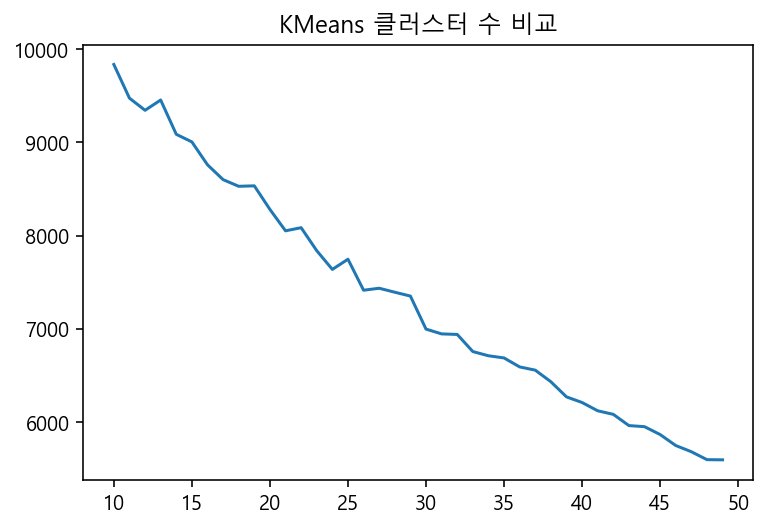

In [41]:
plt.plot(range(start, end), inertia)
plt.title("KMeans 클러스터 수 비교")

In [42]:
n_clusters = 30
cls = KMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["cluster"] = predict

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [43]:
# 각각의 클러스터에 군집화된 원소의 갯수
df["cluster"].value_counts().head(10)

0     1916
20      85
23      43
25      39
7       33
5       30
3       29
28      29
11      21
8       18
Name: cluster, dtype: int64

In [44]:
# batch_size를 쓸 수 있는 MinibatchKMeans로 군집화
from sklearn.cluster import MiniBatchKMeans
b_inertia = []

# 적절한 클러스터의 갯수를 알기 위해 inertia 값을 구함
for i in trange(start, end):
    cls = MiniBatchKMeans(n_clusters=i, random_state=42)
    cls.fit(feature_vector)
    b_inertia.append(cls.inertia_)

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:07<00:00,  3.02it/s]


In [45]:
b_inertia

[11239.885425256893,
 11515.114547647006,
 11263.545981316545,
 10711.230656931284,
 10870.315022971417,
 10795.404528720599,
 10655.314419603457,
 10819.655506003652,
 11143.91062571833,
 10475.346889108498,
 9863.96553268126,
 10441.681399916957,
 10240.151186599598,
 10081.45137218925,
 10404.317424772295,
 10476.613910952028,
 9527.568440343633,
 9700.752821629858,
 9753.857126259381,
 9768.74577314384,
 9856.024411441516,
 10069.919346776884,
 10198.866165985271,
 9956.980766698054,
 9082.334861118934,
 8771.2646310106,
 9469.7422836641,
 9577.274581201002,
 9981.219205313464,
 8471.52247145398,
 8075.730238239666,
 8705.790164201431,
 8634.550281758753,
 7819.579864153261,
 7961.598092355058,
 8383.905100997796,
 8746.751299961657,
 8552.27270889066,
 8097.610870667501,
 8852.425428981403]

Text(0.5, 1.0, 'MiniBatchKMeans 클러스터 수 비교')

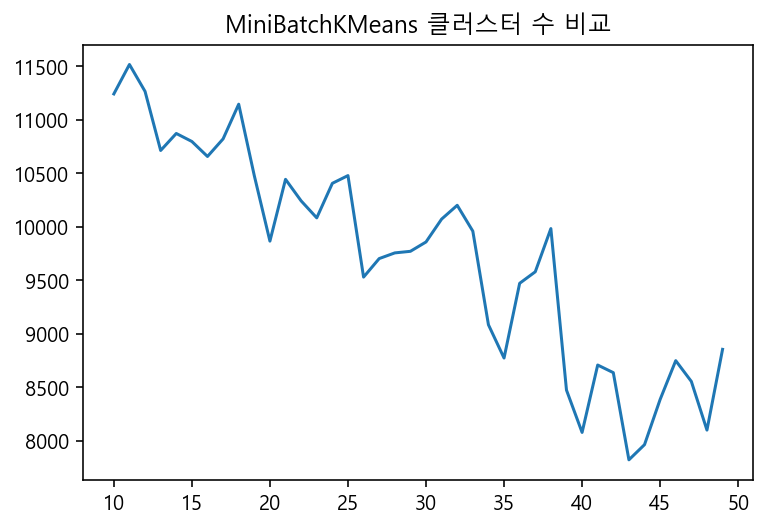

In [46]:
plt.plot(range(start, end), b_inertia)
plt.title("MiniBatchKMeans 클러스터 수 비교")

In [47]:
cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
cls.fit(feature_vector)
predict = cls.predict(feature_vector)
df["bcluster"] = predict

C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [48]:
df["bcluster"].value_counts()

5     1436
0      491
1       91
6       87
22      46
20      33
25      30
9       30
15      28
2       24
4       19
26      19
8       17
14      15
11      12
18      10
3        9
17       7
7        3
28       2
10       2
Name: bcluster, dtype: int64

In [49]:
df[df["bcluster"]==1].head()

,text,origin_text,course,머신러닝,딥러닝,파이썬,판다스,공공데이터,django,크롤링,...,웹개발,엑셀,c,자바,자바스크립트,node,vue,리액트,cluster,bcluster
71,프론트엔드 개발자로써 트렌드 기술 스택을 쌓고 싶어요! #웹게임을 만들며 배우는 t...,프론트엔드 개발자로써 트렌드 기술 스택을 쌓고 싶어요! #웹게임을 만들며 배우는 T...,프론트엔드 개발자로써 트렌드 기술 스택을 쌓고 싶어요! #웹게임을 만들며 배우는 t...,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,0,1
78,비전공자인데 프론트엔드 개발자로 취업하고 싶어요! 아직 초보지만 인프런 강의를 통해...,비전공자인데 프론트엔드 개발자로 취업하고 싶어요! 아직 초보지만 인프런 강의를 통해...,비전공자인데 프론트엔드 개발자로 취업하고 싶어요! 아직 초보지만 인프런 강의를 통해...,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0,1
86,웹퍼블리셔에서 프론트엔드개발자로 전향하려고 합니다 자바스크립트 기본기부터 제대로 공...,웹퍼블리셔에서 프론트엔드개발자로 전향하려고 합니다 자바스크립트 기본기부터 제대로 공...,자바스크립트 es6+ 제대로 알아보기 - 초급,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,0,1
112,코딩을 통해 반복적인 업무를 줄이고 업무효율성을 극대화 하고 싶어요!!!\n\n#관...,코딩을 통해 반복적인 업무를 줄이고 업무효율성을 극대화 하고 싶어요!!!\n\n#관...,"프로그래밍 시작하기-파이썬 입문, 우리를 위한 프로그래밍-파이썬 중급",False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,0,1
128,타입스크립트 기초를 탄탄하게!\n웹 게임을 만들며 배우는 typescript,타입스크립트 기초를 탄탄하게!\n웹 게임을 만들며 배우는 TypeScript,타입스크립트 기초를 탄탄하게!\n웹 게임을 만들며 배우는 typescript,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,0,1


In [50]:
df.loc[df["bcluster"] == 1, ["bcluster", "cluster", "course"]]

,bcluster,cluster,course
71,1,0,프론트엔드 개발자로써 트렌드 기술 스택을 쌓고 싶어요! #웹게임을 만들며 배우는 t...
78,1,0,비전공자인데 프론트엔드 개발자로 취업하고 싶어요! 아직 초보지만 인프런 강의를 통해...
86,1,0,자바스크립트 es6+ 제대로 알아보기 - 초급
112,1,0,"프로그래밍 시작하기-파이썬 입문, 우리를 위한 프로그래밍-파이썬 중급"
128,1,0,타입스크립트 기초를 탄탄하게!\n웹 게임을 만들며 배우는 typescript
...,...,...,...
2390,1,0,에센스만 담은 하울의 코틀린 안드로이드
2410,1,0,인프런의 취업을 위한 신입 자바 개발자 로드맵에 있는 6개의 강의들!
2420,1,26,프로그래밍 시작하기 파이썬 입문 (inflearn original)
2425,1,26,프로그래밍 시작하기 파이썬 입문 (inflearn original)


In [51]:
# 원소갯수 많은 클러스터 순서
df["bcluster"].value_counts().keys()

Int64Index([5, 0, 1, 6, 22, 20, 25, 9, 15, 2, 4, 26, 8, 14, 11, 18, 3, 17, 7,
            28, 10],
           dtype='int64')

In [52]:
# bcluster 와 cluster 컬럼을 통해 군집화의 서로다른 특징 비교 가능
df.loc[df["bcluster"] == 6, ["bcluster", "cluster", "origin_text", "course"]].tail(10)

,bcluster,cluster,origin_text,course
2259,6,20,군 복학생입니다. 처음부터 다시 시작한다는 마음으로 열심히 달리겠습니다!\n#관심강...,"홍정모의 따라하며 배우는 c, 홍정모의 따라하며 배우는 c++"
2262,6,16,"현재 홍정모 교수님의 강의를 중심으로 c,c++을 수강하고자 해요. c언어로 된 강...","홍정모의 따라하며 배우는 c, 홍정모의 따라하며 배우는 c++,홍정모의 게임 만들..."
2268,6,16,홍정모 교수님처럼 훌륭한 그래픽스 프로그래머가 되기위해 기초를 다지는것이 2020년...,"홍정모의 따라하며 배우는 c, 홍정모의 따라하며 배우는 c++,홍정모의 게임 만들..."
2275,6,20,"기초를 탄탄히 하고, 백엔드 취업을 희망하는만큼 관련 공부를 하고자 합니다! \n공...","홍정모의 따라하며 배우는 c, 홍정모의 따라하며 배우는 c++, \n만들어 가면서..."
2318,6,20,컴퓨터공학과 학생이에요\n2학년때 C/C++ 알고리즘도 하면서 계속 공부했는데 아직...,홍정모의 따라하며 배우는 c++
2335,6,20,이번에는 c++ 완강을 목표로!!!!\n#관심강의:홍정모의 따라하며 배우는 C++;,홍정모의 따라하며 배우는 c++;
2371,6,20,"2020년 목표\n늦깍이 개발자로서의 길을 위한 기초닦기 - c++ 공부, 자바공부...","홍정모의 따라하며 배우는 c++, 실전자바"
2379,6,20,"비전공자 컴공석사 입학생입니다.\n방학간 C/C++학습하고 자료구조, 컴퓨터 구조를...","홍정모의 따라하며 배우는 c언어, 홍정모의 따라하며 배우는 c++, c로배우는 ..."
2389,6,20,명확한 꿈과 구체적인 목표가 없어서 많은 방황을 해온 대학생입니다.\n이젠 한 분야...,명확한 꿈과 구체적인 목표가 없어서 많은 방황을 해온 대학생입니다.\n이젠 한 분야...
2426,6,20,"2020년 공부 목표 :\nc언어, c++ ,알고리즘과 자료구조의 탄탄한 기본을 다...",홍정모의 따라하며 배우는 c언어


## 7.클러스터 예측 정확도 확인하기

In [53]:
# n_clusters 위에서 정의한 클러스터 수를 사용
feature_array = feature_vector.toarray()

# 예측한 클러스터의 유니크 값
labels = np.unique(predict)
df_cluster_score = []
df_cluster = []
for label in labels:
    id_temp = np.where(predict == label) # 예측한 값이 클러스터 번호와 매치 되는 것을 가져온다.
    x_means = np.mean(feature_array[id_temp], axis = 0) # 클러스터의 평균 값을 구함
    sorted_means = np.argsort(x_means)[::-1][:n_clusters] # 값을 역순으로 정렬해서 클러스터 수 만큼 가져온다.
    features = vectorizer.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
    # 클러스터별 전체 스코어
    df_score = pd.DataFrame(best_features, columns = ['features', 'score'])
    df_cluster_score.append(df_score)
    # 클러스터 대표 키워드
    df_cluster.append(best_features[0])

In [54]:
np.argsort(x_means)[::-1]

array([2257, 2068, 2258, ..., 1548, 1547,    0], dtype=int64)

In [55]:
# 개별 클러스터에서 점수가 가장 높은 단어를 추출 아래 점수가 클수록 예측 정확도가 높음
# MiniBatchKMeans 로 예측한 값 기준
pd.DataFrame(df_cluster, columns = ['features', 'score']).sort_values(by=["features", "score"], ascending=False)

,features,score
6,홍정모의 따라하며 배우는,1.114943
3,홍정모의 게임 만들기,1.000000
20,합니다 파이썬 머신러닝 완벽,1.000000
11,함수형 프로그래밍과 자바스크립트,1.333333
19,하는 리액트 초심자를,1.000000
18,파이썬 실전 100 활용,1.000000
0,파이썬 머신러닝 완벽,0.089613
8,통해 성장하는 서비스를 만드는,1.000000
14,야곰의 ios 프로그래밍,1.000000
2,실전 스프링 부트와 jpa,1.125000


In [56]:
# 정확도가 1이 나온 클러스터를 찾아봄 - 같은 강좌끼리 묶였는지 확인 함
df.loc[df["bcluster"] == 3, ["bcluster", "cluster", "origin_text", "course"]]

,bcluster,cluster,origin_text,course
538,3,16,2020년에는 C++을 씹어먹으려고 해요!!!\n현재 관심강의는 : 홍정모의 따라하...,"는 홍정모의 따라하며 배우는 c++, 홍정모의 게임 만들기 연습 문제 패키지 이에욤."
1000,3,0,공부해야죠\n##관심: 홍정모의 게임 만들기 연습 문제 패키지,공부해야죠\n##관심 홍정모의 게임 만들기 연습 문제 패키지
1005,3,0,올해 안에 인턴 자리를 구하는 게 목표입니다!\n#관심강의: 홍정모의 게임 만들기 ...,홍정모의 게임 만들기 연습 문제 패키지
1177,3,0,컴공과 학생입니다. 아직 진로를 정하지 못해서 다양한 분야를 공부해보고 싶습니다!\...,홍정모의 게임 만들기 연습문제 패키지
1268,3,0,코딩 공부는 재밌게 해야 제맛~ 평소 좋아하는 게임을 만들어 보며 코딩 공부도 하고...,홍정모의 게임 만들기 연습 문제 패키지
1283,3,0,2020년부터 제대로 게임프로그래밍 분야로 공부하고 싶어요!\n#관심강의 : 홍정모...,홍정모의 게임 만들기 연습 문제 패키지
2065,3,0,안녕하세요. 2020년 상반기 취업준비를 하고있는 컴공과 학생입니다.\nc는 배웠지...,홍정모의 게임 만들기 연습 문제 패키지
2077,3,16,다양한 언어기반으로 적응력 높은 개발자로 전직하고싶습니다.\n\n#관심강의: 홍정모...,"홍정모의 따라하며 배우는 c++, 홍정모의 게임 만들기 연습 문제 패키지, 남박사..."
2256,3,0,"취미로 프로그래밍을 공부하고 있습니다. 올해 c, c++을 공부하려고합니다.\n#관...",홍정모의 게임 만들기 연습 문제 패키지


## 8.word_cloud

In [57]:
from wordcloud import WordCloud

# 불용어 - 자주 등장하지만 의미가 크지 않아 제외하고 싶은 텍스트
stopwords = ["관심 강의", "관심강의", "관심", "강의", "강좌", "강의를",
             "올해", "올해는", "열심히", "공부를", "합니다", "하고", "싶어요", 
             "있는", "있습니다", "싶습니다", "2020년"]
# 불용어를 제거하지 않고 그리려면 아래 주석을 풀어서 stopword 변수에 덮어쓰기 합니다.
# stopwords = []
def displayWordCloud(data = None, backgroundcolor = 'black', width = 1280, height = 768):
    wordcloud = WordCloud(
        font_path = r'C:\Users\한대연\아나콘다\Git Analysis\font_file\D2Coding-Ver1.3.2-20180524\D2Coding\D2CodingBold-Ver1.3.2-20180524.ttf', # 폰트설정이 불가능해서 직접 경로 지정
        stopwords = stopwords,
    background_color = backgroundcolor,
    width = width, height= height,
    random_state = 42).generate(data)
    plt.figure(figsize = (15,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

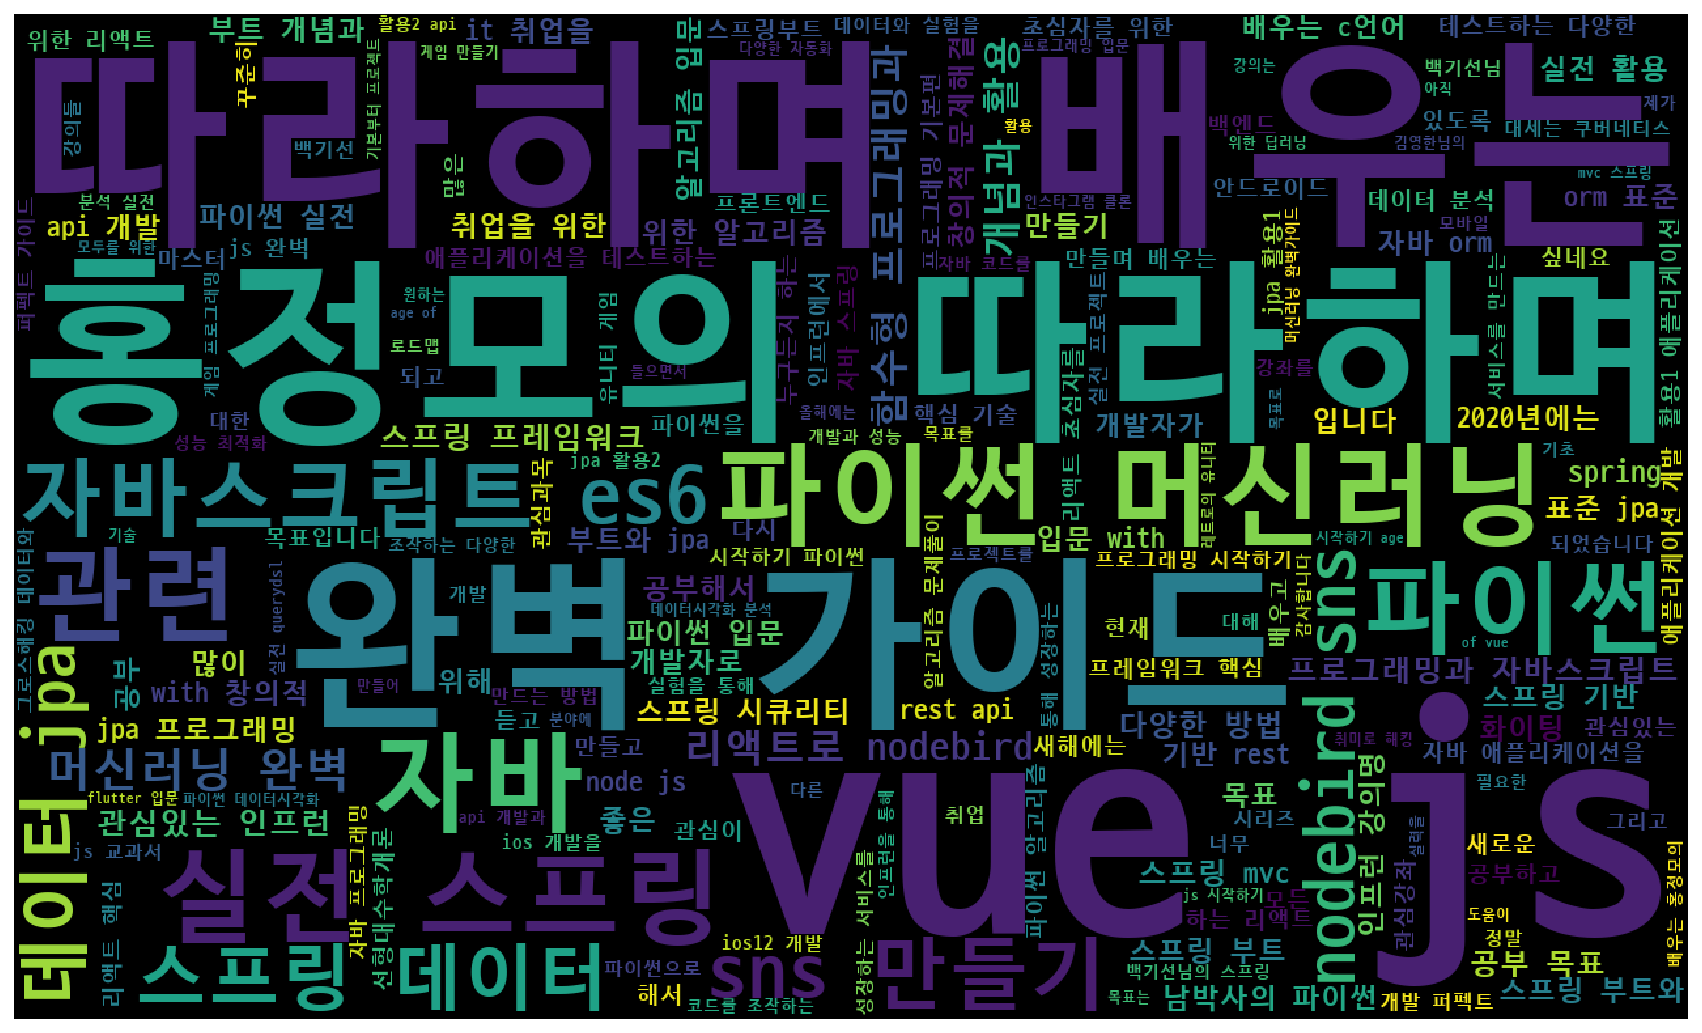

In [58]:
course_text = " ".join(df["course"])
displayWordCloud(course_text)